In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

data=pd.read_csv('new_df.csv')
data

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,availability_365
0,Kensington,40.64749,-73.97237,Private room,149,1,9,365
1,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,355
2,Harlem,40.80902,-73.94190,Private room,150,3,0,365
3,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,194
4,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0
...,...,...,...,...,...,...,...,...
48890,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,9
48891,Bushwick,40.70184,-73.93317,Private room,40,4,0,36
48892,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,27
48893,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,2


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   neighbourhood      48895 non-null  object 
 1   latitude           48895 non-null  float64
 2   longitude          48895 non-null  float64
 3   room_type          48895 non-null  object 
 4   price              48895 non-null  int64  
 5   minimum_nights     48895 non-null  int64  
 6   number_of_reviews  48895 non-null  int64  
 7   availability_365   48895 non-null  int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 3.0+ MB


In [4]:
data.isnull().sum()

neighbourhood        0
latitude             0
longitude            0
room_type            0
price                0
minimum_nights       0
number_of_reviews    0
availability_365     0
dtype: int64

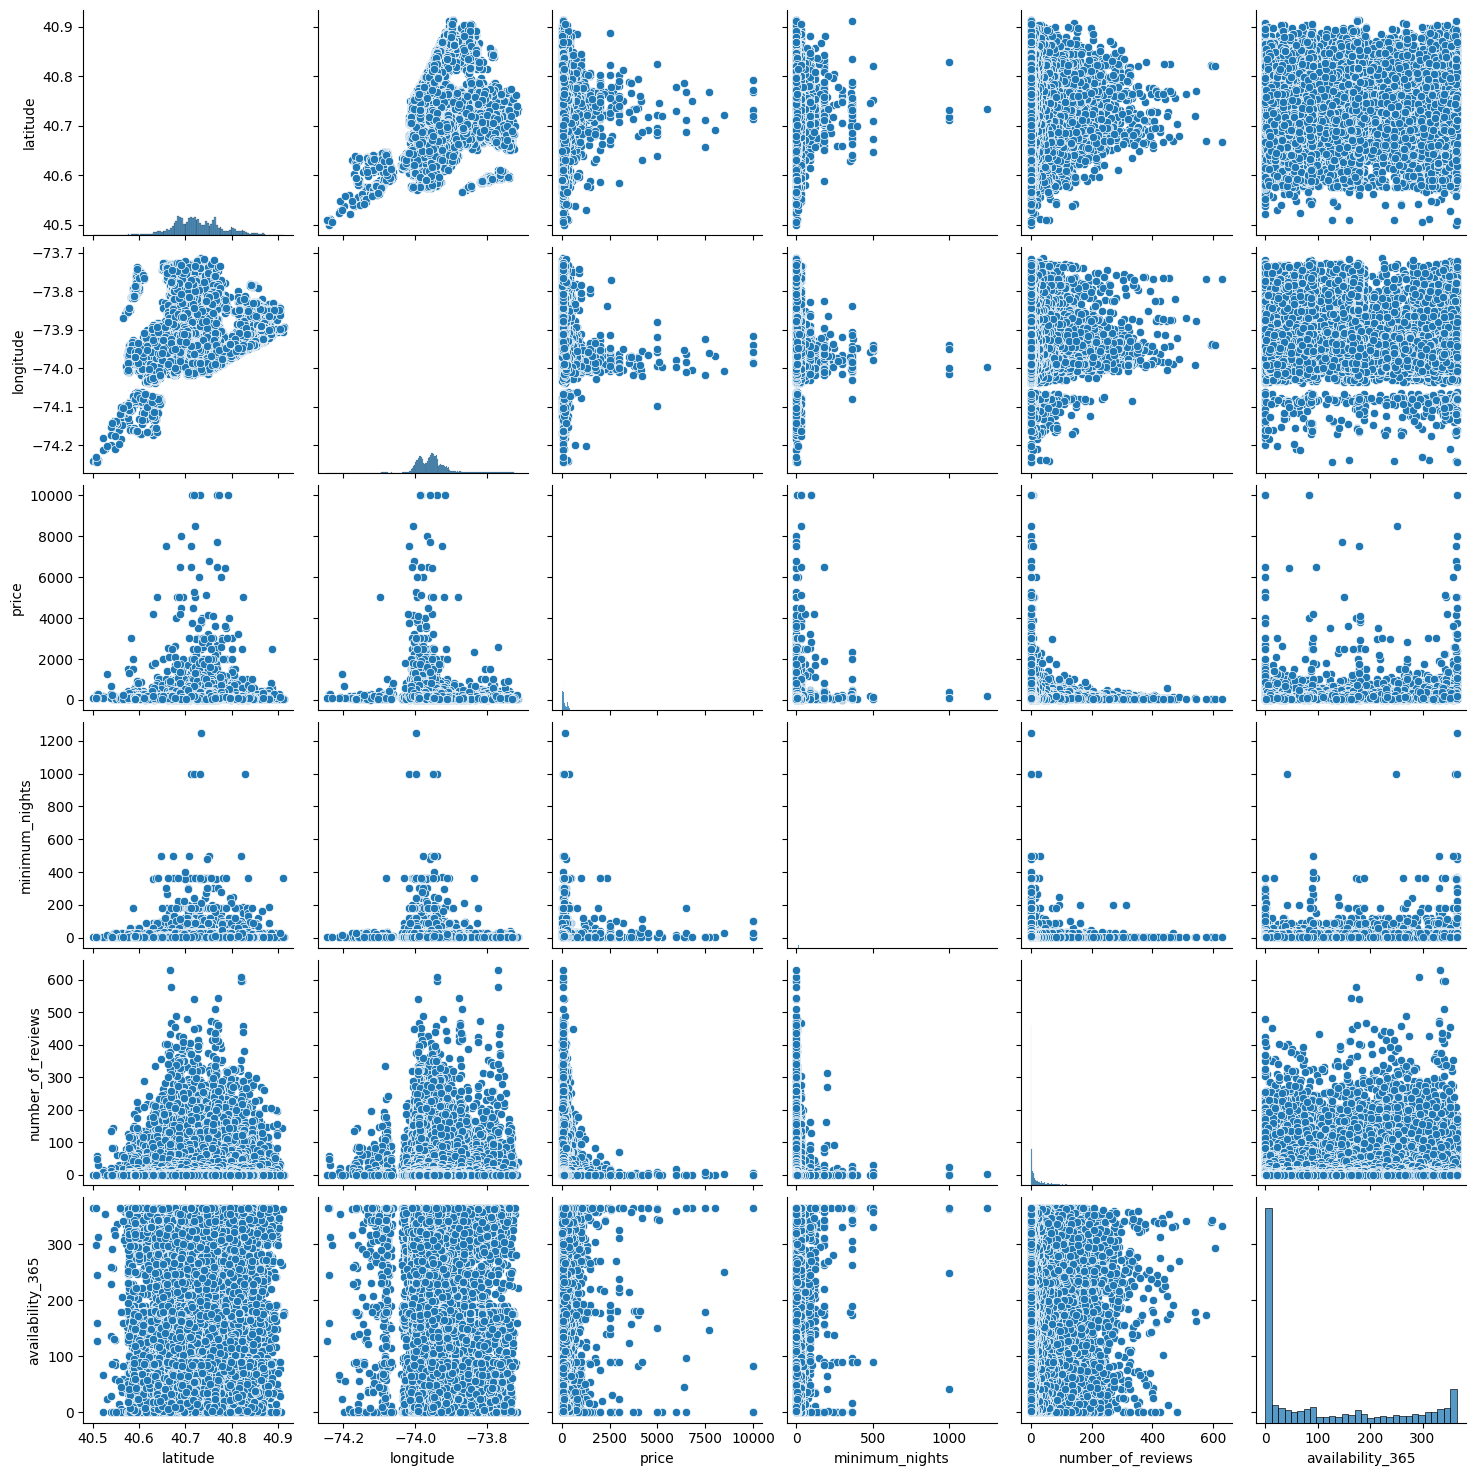

In [7]:
sns.pairplot(data)

In [8]:
data.columns

Index(['neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'availability_365'],
      dtype='object')

In [9]:
x=data[[ 'latitude', 'longitude','minimum_nights', 'number_of_reviews', 'availability_365']]
y=data['price']
x_train,x_test,y_train, y_test=train_test_split(x, y, test_size = 0.3)

In [12]:
# linear regresssion models
model=LinearRegression()
model.fit(x_train, y_train)
print(model.coef_)
print(model.intercept_)
pd.DataFrame(model.coef_, x.columns, columns = ['Coeff'])

[ 2.06962883e+02 -8.15101275e+02  1.11100544e-01 -3.02034554e-01
  1.91564667e-01]
-68570.5626932478


,Coeff
latitude,206.962883
longitude,-815.101275
minimum_nights,0.111101
number_of_reviews,-0.302035
availability_365,0.191565


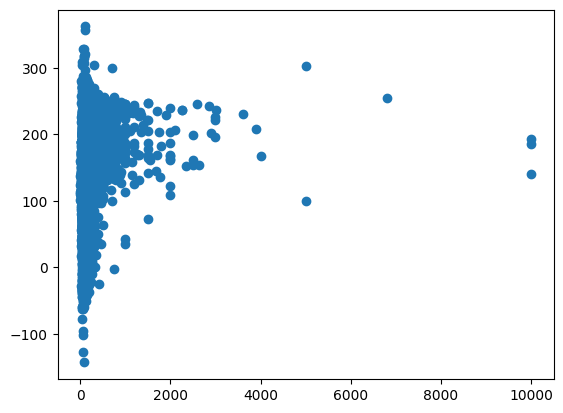

In [14]:
# making predictions
predictions= model.predict(x_test)
plt.scatter(y_test, predictions)

(array([1.456e+04, 7.600e+01, 2.100e+01, 5.000e+00, 2.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 3.000e+00]),
 array([-272.96828303,  740.22754039, 1753.42336382, 2766.61918725,
        3779.81501068, 4793.01083411, 5806.20665754, 6819.40248097,
        7832.5983044 , 8845.79412783, 9858.98995126]),
 <BarContainer object of 10 artists>)

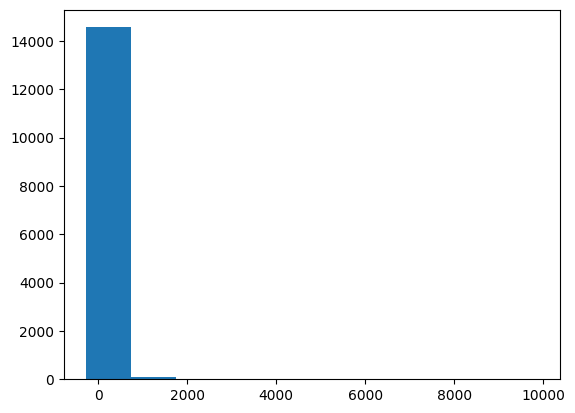

In [15]:
plt.hist(y_test - predictions)

In [18]:
mean= metrics.mean_absolute_error(y_test, predictions)
mean

85.78258648815346

In [20]:
mse = metrics.mean_squared_error(y_test, predictions)
mse

53058.53274003435

In [21]:
rmse= np.sqrt(metrics.mean_squared_error(y_test, predictions))
rmse

230.3443785726805

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


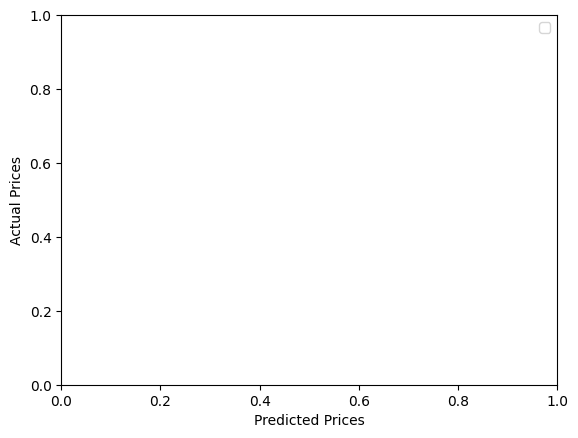

In [25]:
# visualize predictions
plt.ylabel('Actual Prices')
plt.xlabel('Predicted Prices')
plt.legend()
plt.show()